In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
#미분 - Parameter: f(함수),x(input_value)
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2) /(2*h)
        x[idx] = tmp_val
    
    return grad

In [3]:
#GradientDescent
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x = x-lr*grad
    return x

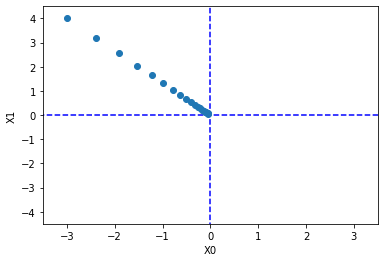

In [4]:
#GradientDescent 예시
#함수선언
def function_2(x):
    return x[0]**2 + x[1]**2

#그리기 위한 Gradient_Descent
#x_history를 통하여 값의 변화를 저장
def plot_gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = plot_gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [5]:
#학습률에 대한 예시
#1. 학습률이 매우 큰 예(발산)
init_x = np.array([-3.0,4.0])
print(gradient_descent(function_2,init_x = init_x, lr=10.0, step_num=100)) #[-2.58983747e+13 -1.29524862e+12]
#2. 학습률이 매우 작은 예(수렴X)
init_x = np.array([-3.0,4.0])
print(gradient_descent(function_2,init_x = init_x, lr=1e-10, step_num=100)) #[-2.99999994  3.99999992]

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [6]:
#2층 Layer 선언
class TwoLayerNet:

    #Parameter 초기화
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    #예측값
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
    def cross_entropy_error(y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        
        # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
        if t.size == y.size:
            t = t.argmax(axis=1)
             
        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [7]:
#사용할 함수 선언
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.78615, 0.793
train acc, test acc | 0.8761666666666666, 0.8794
train acc, test acc | 0.8976, 0.9008
train acc, test acc | 0.9065, 0.911
train acc, test acc | 0.9135333333333333, 0.9183
train acc, test acc | 0.91925, 0.9208
train acc, test acc | 0.9226166666666666, 0.9246
train acc, test acc | 0.92715, 0.9289
train acc, test acc | 0.9302666666666667, 0.9311
train acc, test acc | 0.9331, 0.9328
train acc, test acc | 0.9365666666666667, 0.9369
train acc, test acc | 0.9385833333333333, 0.9377
train acc, test acc | 0.9415833333333333, 0.9412
train acc, test acc | 0.9433, 0.9408
train acc, test acc | 0.9450666666666667, 0.944
train acc, test acc | 0.9460833333333334, 0.9454


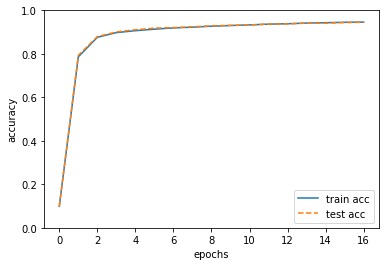

In [8]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.v(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()